In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from pandas.plotting import register_matplotlib_converters
from urllib.request import urlretrieve

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
today = date.today()
register_matplotlib_converters()

In [3]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'

In [4]:
urlretrieve(url,'covid_19.xlsx')

('covid_19.xlsx', <http.client.HTTPMessage at 0x1a1f9b8710>)

In [5]:
df = pd.read_excel('covid_19.xlsx',parse_dates=['dateRep'])
df.dropna(axis=0,inplace=True)

### Countries with the most cases

Text(0.5, 1.0, 'Countries with the most cases')

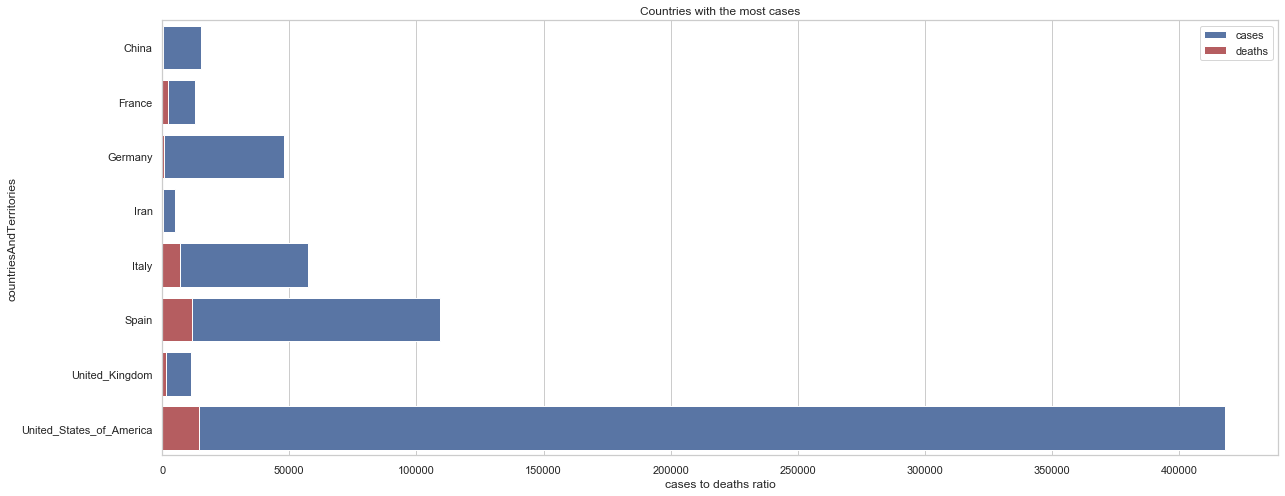

In [6]:
plt.figure(figsize = (20,8))
cases_1000 = df[df['cases'] >= 5000].reset_index()
countries_1000 = cases_1000.groupby(cases_1000['countriesAndTerritories'])['deaths','cases'].sum()
sns.barplot(x=countries_1000.cases,y=countries_1000.index,alpha = 1,color = 'b',label = 'cases')
sns.barplot(x=countries_1000.deaths,y=countries_1000.index, alpha = 1,color = 'r',label='deaths')
plt.xlabel ('cases to deaths ratio')
plt.legend()
plt.title('Countries with the most cases')

# Rate of infection = K × (the number of infections)/(the number of population)

In [7]:
# World Population as of 2019
pop = 7.75 * 1000000000

In [8]:
df2 = df.groupby(df.dateRep)['cases','deaths'].sum()


In [9]:
df2['Estimated_Population'] = pop - df2.deaths.shift().apply(lambda x : ((x+2.5)-1))
df2['total_cases'] = df2['cases'].cumsum()
df2['total_deaths'] = df2['deaths'].cumsum()
df2.dropna(inplace=True)

In [10]:
def normalise_col(data):
    if data < 0.01:
        return data * 1000
    elif data < 0.1:
        return data * 100
    else:
        return data * 10

In [11]:
df2['infection_rate_%'] = ((df2['cases']/df2['Estimated_Population'])*100).apply(normalise_col)
df2['mortality_rate_%'] = ((df2['deaths']/df2['Estimated_Population'])*100).apply(normalise_col)

In [17]:
df2.tail(30)

,cases,deaths,Estimated_Population,total_cases,total_deaths,infection_rate_%,mortality_rate_%
dateRep,,,,,,,
2020-03-11,4355,269,7.750000e+09,117851,4285,0.056194,0.003471
2020-03-12,6856,326,7.750000e+09,124707,4611,0.088465,0.004206
2020-03-13,8333,351,7.750000e+09,133040,4962,0.107523,0.004529
2020-03-14,9341,438,7.750000e+09,142381,5400,0.120529,0.005652
2020-03-15,11481,354,7.750000e+09,153862,5754,0.148142,0.004568
2020-03-16,12560,745,7.750000e+09,166422,6499,0.162065,0.009613
2020-03-17,12632,596,7.749999e+09,179054,7095,0.162994,0.007690
2020-03-18,14650,789,7.749999e+09,193704,7884,0.189032,0.010181
2020-03-19,18226,951,7.749999e+09,211930,8835,0.235174,0.012271


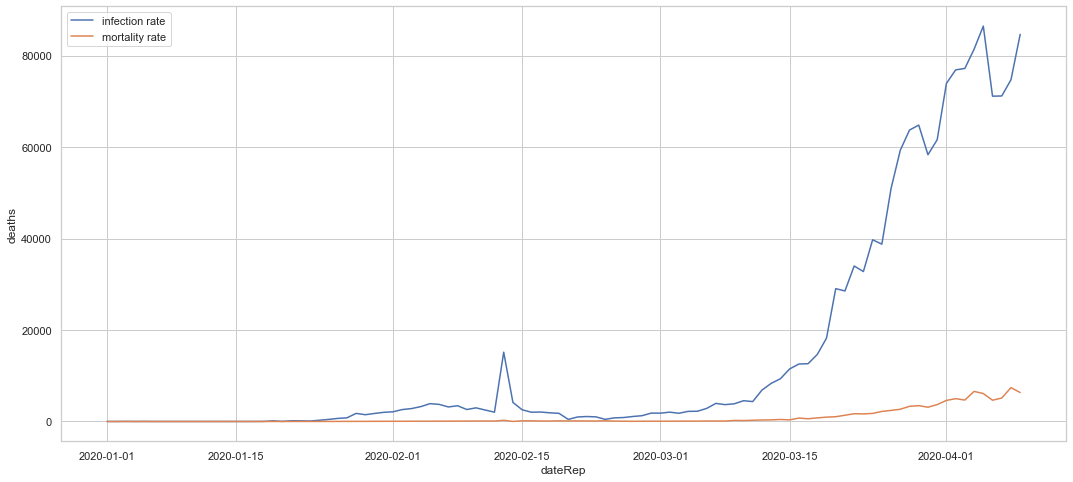

In [13]:
plt.figure(figsize=(18,8))
sns.lineplot(x = df2.index, y = df2['cases'])
sns.lineplot(x = df2.index, y = df2['deaths'])
plt.legend(['infection rate','mortality rate'])

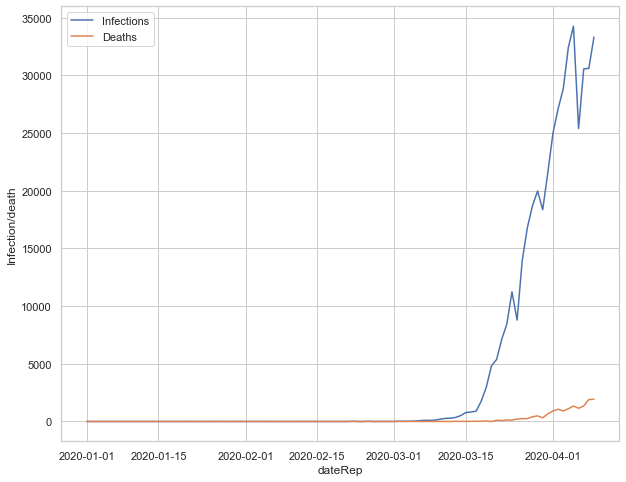

In [14]:
country = df[df.countriesAndTerritories == 'United_States_of_America']
country = country.groupby(country.dateRep)['cases','deaths'].sum()
country['total_cases'] = country.cases.cumsum()
country['total_deaths'] = country.deaths.cumsum()
country['pop'] = pop - country.deaths.shift()
country.dropna(inplace=True)
country['pop'] = country['pop'].apply(lambda x : ((x+2.5)-1))
country['infection_rate_%'] = ((country['total_cases']/country['pop'])*100)
country['mortality_rate_%'] = ((country['total_deaths']/country['pop'])*100)
plt.figure(figsize=(10,8))
sns.lineplot(x = country.index, y= country['cases'])
sns.lineplot(x = country.index, y= country['deaths'])
plt.ylabel('Infection/death')
plt.legend(['Infections','Deaths'])

### World Population Trend (Approximation)

Text(0.5, 1.0, 'Drop in population (approx)')

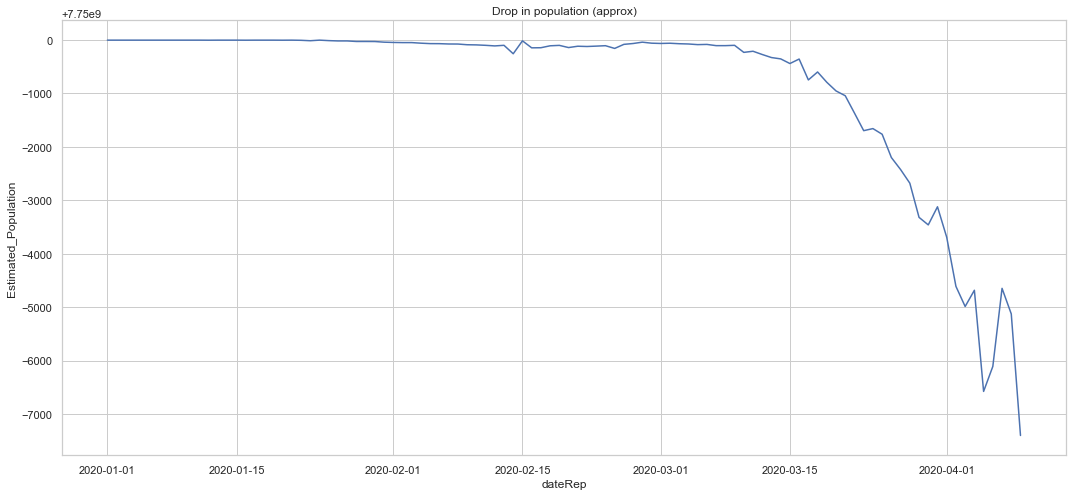

In [15]:
plt.figure(figsize=(18,8))
sns.lineplot(x = df2.index, y = df2['Estimated_Population'])
plt.title('Drop in population (approx)')

In [16]:
print(url[-14:-5])
print(today)
print('There are {0} cases and {1} deaths as of today \nThere are {2} new cases today and {3} deaths were recorded today as well \nGod Save us all'
      .format(df2.total_cases[-1], df2.total_deaths[-1], df2.cases[-1], df2.deaths[-1]))

worldwide
2020-04-09
There are 1470752 cases and 87710 deaths as of today 
There are 84633 new cases today and 6328 deaths were recorded today as well 
God Save us all
